In [ ]:
%%bash
#pip install xgboost
#pip install --upgrade pip
#pip install missingno
#pip install graphviz

In [155]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import sklearn
print(sklearn.__version__)

0.19.1


In [89]:
bucket='dxl-demo'
file='chronic_kidney_disease.csv'
file_location  = 'S3://{}/{}'.format(bucket,file)
df = pd.read_csv(file_location)
df.head()

,48,80,1.020,1,0,?,normal,notpresent,notpresent.1,121,...,44,7800,5.2,yes,yes.1,no,good,no.1,no.2,ckd
0,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
1,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
2,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
3,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
4,60,90,1.015,3,0,?,?,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd


In [90]:
df.columns=['age','bp','sp_gravity','albumin', 'sugar','rbc_level', 'puscell_presentornot','pus_cell_clumps','bacteria', 'blood_gluc_random','blood_urea','serum_creatinine','sodium','potassium','hgb', 'packed_cell_vol','wbc_count','rbc_count','hypertension','diabetus_mellitus','cad', 'appetite', 'pedal_edema','anemia','class']

In [91]:
df.head()

,age,bp,sp_gravity,albumin,sugar,rbc_level,puscell_presentornot,pus_cell_clumps,bacteria,blood_gluc_random,...,packed_cell_vol,wbc_count,rbc_count,hypertension,diabetus_mellitus,cad,appetite,pedal_edema,anemia,class
0,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
1,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
2,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
3,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
4,60,90,1.015,3,0,?,?,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
age                     399 non-null object
bp                      399 non-null object
sp_gravity              399 non-null object
albumin                 399 non-null object
sugar                   399 non-null object
rbc_level               399 non-null object
puscell_presentornot    399 non-null object
pus_cell_clumps         399 non-null object
bacteria                399 non-null object
blood_gluc_random       399 non-null object
blood_urea              399 non-null object
serum_creatinine        399 non-null object
sodium                  399 non-null object
potassium               399 non-null object
hgb                     399 non-null object
packed_cell_vol         399 non-null object
wbc_count               399 non-null object
rbc_count               399 non-null object
hypertension            399 non-null object
diabetus_mellitus       399 non-null object
cad            

In [93]:
df_clean1 = df.replace('?', np.NaN)
print(df_clean1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
age                     390 non-null object
bp                      387 non-null object
sp_gravity              352 non-null object
albumin                 353 non-null object
sugar                   350 non-null object
rbc_level               248 non-null object
puscell_presentornot    334 non-null object
pus_cell_clumps         395 non-null object
bacteria                395 non-null object
blood_gluc_random       355 non-null object
blood_urea              380 non-null object
serum_creatinine        382 non-null object
sodium                  313 non-null object
potassium               312 non-null object
hgb                     347 non-null object
packed_cell_vol         328 non-null object
wbc_count               293 non-null object
rbc_count               268 non-null object
hypertension            397 non-null object
diabetus_mellitus       397 non-null object
cad            

In [94]:
df_clean1.head()

,age,bp,sp_gravity,albumin,sugar,rbc_level,puscell_presentornot,pus_cell_clumps,bacteria,blood_gluc_random,...,packed_cell_vol,wbc_count,rbc_count,hypertension,diabetus_mellitus,cad,appetite,pedal_edema,anemia,class
0,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
1,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
2,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
3,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
4,60,90,1.015,3,0,NaN,NaN,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd


In [95]:
df_clean1.isnull().sum()

age                       9
bp                       12
sp_gravity               47
albumin                  46
sugar                    49
rbc_level               151
puscell_presentornot     65
pus_cell_clumps           4
bacteria                  4
blood_gluc_random        44
blood_urea               19
serum_creatinine         17
sodium                   86
potassium                87
hgb                      52
packed_cell_vol          71
wbc_count               106
rbc_count               131
hypertension              2
diabetus_mellitus         2
cad                       2
appetite                  1
pedal_edema               1
anemia                    1
class                     0
dtype: int64

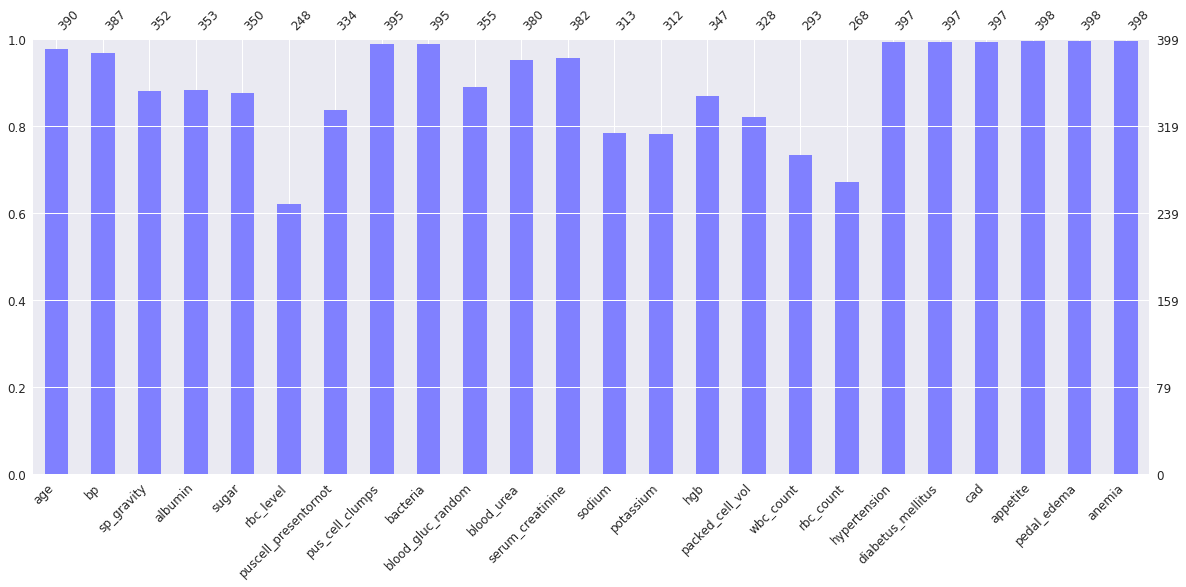

In [96]:
import missingno as msno
missingValueColumns = df_clean1.columns[df_clean1.isnull().any()].tolist()
msno.bar(df_clean1[missingValueColumns],\
            figsize=(20,8),color=(0.5, 0.5, 1),fontsize=12,labels=True,)

In [97]:
df_clean2 = df_clean1.apply(pd.to_numeric, errors='ignore')

In [98]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
age                     390 non-null float64
bp                      387 non-null float64
sp_gravity              352 non-null float64
albumin                 353 non-null float64
sugar                   350 non-null float64
rbc_level               248 non-null object
puscell_presentornot    334 non-null object
pus_cell_clumps         395 non-null object
bacteria                395 non-null object
blood_gluc_random       355 non-null float64
blood_urea              380 non-null float64
serum_creatinine        382 non-null float64
sodium                  313 non-null float64
potassium               312 non-null float64
hgb                     347 non-null float64
packed_cell_vol         328 non-null float64
wbc_count               293 non-null float64
rbc_count               268 non-null float64
hypertension            397 non-null object
diabetus_mellitus       397 non-null object
c

In [99]:
df_clean2.loc[(df_clean2.hgb < 13.5) & (df_clean2.packed_cell_vol < 41.5) & (df_clean2.blood_urea < 17)]

,age,bp,sp_gravity,albumin,sugar,rbc_level,puscell_presentornot,pus_cell_clumps,bacteria,blood_gluc_random,...,packed_cell_vol,wbc_count,rbc_count,hypertension,diabetus_mellitus,cad,appetite,pedal_edema,anemia,class
61,15.0,60.0,1.020,3.0,0.0,NaN,normal,notpresent,notpresent,86.0,...,33.0,7700.0,3.8,yes,yes,no,good,no,no,ckd
107,45.0,80.0,1.015,0.0,0.0,NaN,abnormal,notpresent,notpresent,107.0,...,37.0,10200.0,4.2,no,no,no,good,no,no,ckd
172,17.0,70.0,1.015,1.0,0.0,abnormal,normal,notpresent,notpresent,22.0,...,41.0,11200.0,NaN,no,no,no,good,no,no,ckd
215,64.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,107.0,...,38.0,NaN,NaN,no,no,no,good,no,no,ckd


In [100]:
df_clean2 ['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [101]:
df_clean2[['kidney_failure']] = df_clean2[['class']].replace(to_replace={'ckd':1,'notckd':0})

In [102]:
df_clean2 ['kidney_failure'].unique()

array([1, 0])

In [104]:
df_clean2.head()
df_clean2.drop('class', inplace=True, axis=1)

In [105]:
df_clean2.head()

,age,bp,sp_gravity,albumin,sugar,rbc_level,puscell_presentornot,pus_cell_clumps,bacteria,blood_gluc_random,...,packed_cell_vol,wbc_count,rbc_count,hypertension,diabetus_mellitus,cad,appetite,pedal_edema,anemia,kidney_failure
0,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,1
1,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
2,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
3,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1
4,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,1


In [80]:
df_clean2['sugar'].unique()                   

array([ 0.,  3.,  4.,  1., nan,  2.,  5.])

In [81]:
### fillna(median) value will fill the nan number with medium value of a dataframe
df_clean2 = df_clean2.fillna(df_clean2.median())
df_clean2['sugar'].unique()

array([0., 3., 4., 1., 2., 5.])

In [118]:
df_clean2 = df_clean2.fillna(0)

In [119]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
age                     399 non-null float64
bp                      399 non-null float64
sp_gravity              399 non-null float64
albumin                 399 non-null float64
sugar                   399 non-null float64
rbc_level               399 non-null object
puscell_presentornot    399 non-null object
pus_cell_clumps         399 non-null object
bacteria                399 non-null object
blood_gluc_random       399 non-null float64
blood_urea              399 non-null float64
serum_creatinine        399 non-null float64
sodium                  399 non-null float64
potassium               399 non-null float64
hgb                     399 non-null float64
packed_cell_vol         399 non-null float64
wbc_count               399 non-null float64
rbc_count               399 non-null float64
hypertension            399 non-null object
diabetus_mellitus       399 non-null object
c

In [120]:
df_clean2.loc[(df_clean2.hgb < 13.5) & (df_clean2.packed_cell_vol < 41.5) & (df_clean2.blood_urea < 17)]

,age,bp,sp_gravity,albumin,sugar,rbc_level,puscell_presentornot,pus_cell_clumps,bacteria,blood_gluc_random,...,packed_cell_vol,wbc_count,rbc_count,hypertension,diabetus_mellitus,cad,appetite,pedal_edema,anemia,kidney_failure
22,21.0,70.0,1.010,0.0,0.0,0,normal,notpresent,notpresent,0.0,...,0.0,0.0,0.0,no,no,no,poor,no,yes,1
53,63.0,80.0,1.010,2.0,2.0,normal,0,notpresent,notpresent,0.0,...,40.0,9800.0,4.2,yes,no,yes,good,no,no,1
54,35.0,80.0,1.005,3.0,0.0,abnormal,normal,notpresent,notpresent,0.0,...,28.0,0.0,0.0,no,no,no,good,yes,no,1
61,15.0,60.0,1.020,3.0,0.0,0,normal,notpresent,notpresent,86.0,...,33.0,7700.0,3.8,yes,yes,no,good,no,no,1
63,55.0,80.0,1.010,0.0,0.0,0,normal,notpresent,notpresent,146.0,...,0.0,0.0,0.0,no,no,no,good,no,no,1
66,45.0,80.0,1.020,3.0,0.0,normal,abnormal,notpresent,notpresent,425.0,...,0.0,0.0,0.0,no,no,no,poor,no,no,1
74,5.0,0.0,1.015,1.0,0.0,0,normal,notpresent,notpresent,0.0,...,0.0,0.0,0.0,no,no,no,good,no,yes,1
107,45.0,80.0,1.015,0.0,0.0,0,abnormal,notpresent,notpresent,107.0,...,37.0,10200.0,4.2,no,no,no,good,no,no,1
112,61.0,90.0,1.015,0.0,2.0,0,normal,notpresent,notpresent,0.0,...,0.0,9800.0,0.0,no,yes,no,poor,no,yes,1
115,0.0,70.0,1.015,4.0,0.0,abnormal,normal,notpresent,notpresent,104.0,...,0.0,0.0,0.0,no,no,no,good,yes,no,1


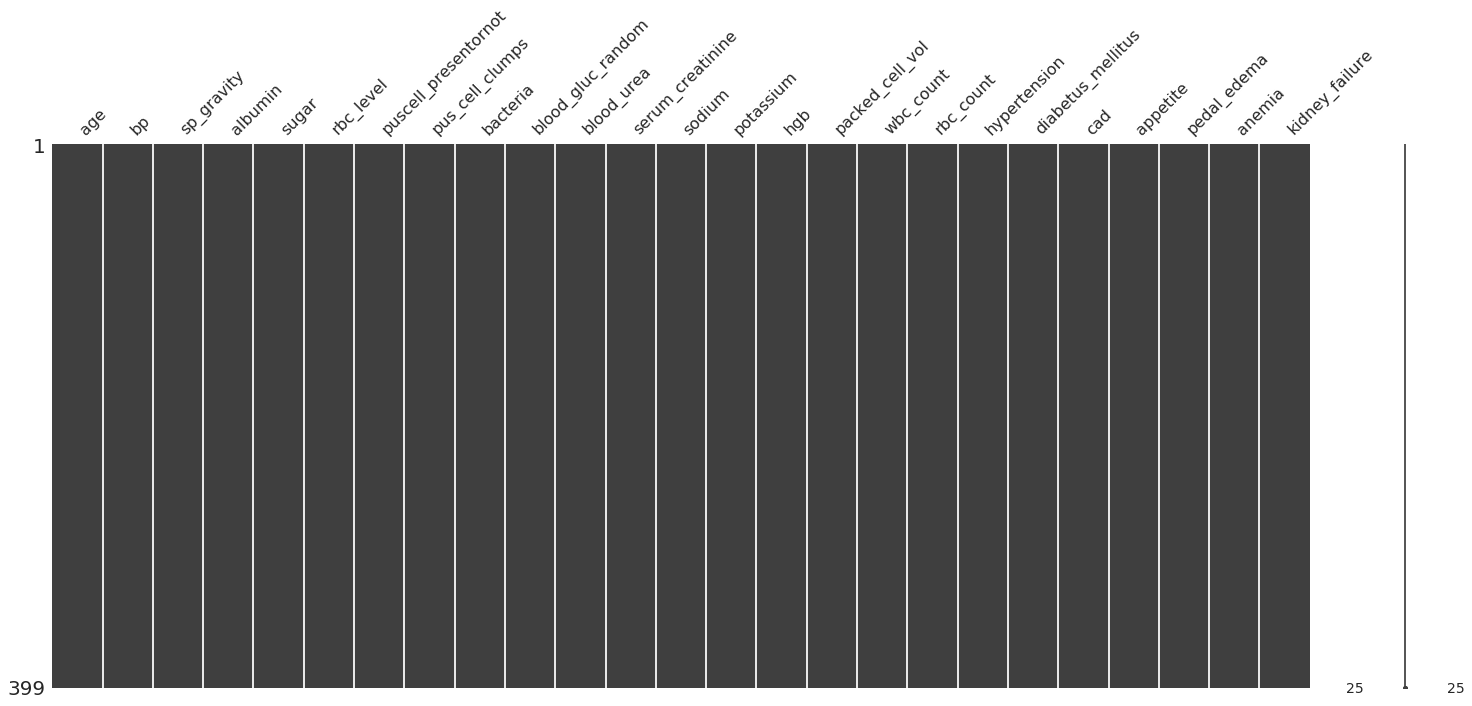

In [121]:
msno.matrix(df_clean2)

In [122]:
df_clean2.head()

,age,bp,sp_gravity,albumin,sugar,rbc_level,puscell_presentornot,pus_cell_clumps,bacteria,blood_gluc_random,...,packed_cell_vol,wbc_count,rbc_count,hypertension,diabetus_mellitus,cad,appetite,pedal_edema,anemia,kidney_failure
0,7.0,50.0,1.020,4.0,0.0,0,normal,notpresent,notpresent,0.0,...,38.0,6000.0,0.0,no,no,no,good,no,no,1
1,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,0.0,no,yes,no,poor,no,yes,1
2,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
3,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1
4,60.0,90.0,1.015,3.0,0.0,0,0,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,1


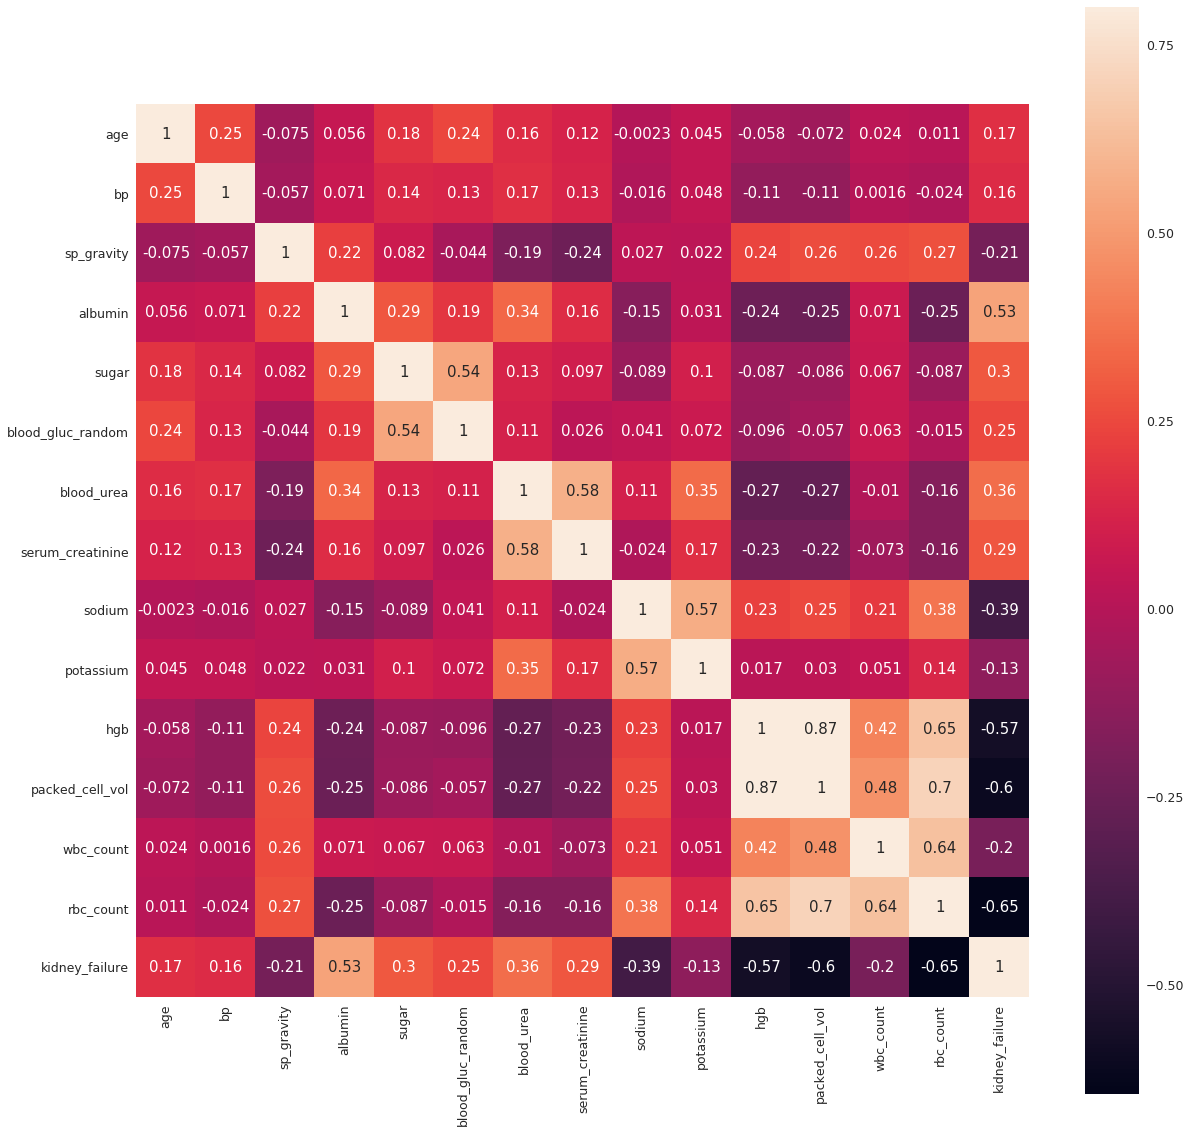

In [123]:
import seaborn as sns
#correlation matrix
corrmat = df_clean2.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True);

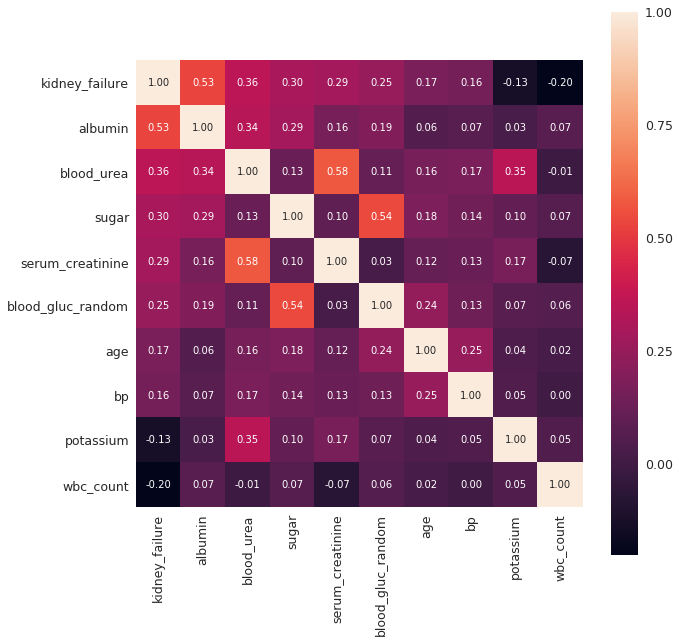

In [124]:
#Kidney disease correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'kidney_failure')['kidney_failure'].index
cm = np.corrcoef(df_clean2[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10, 10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

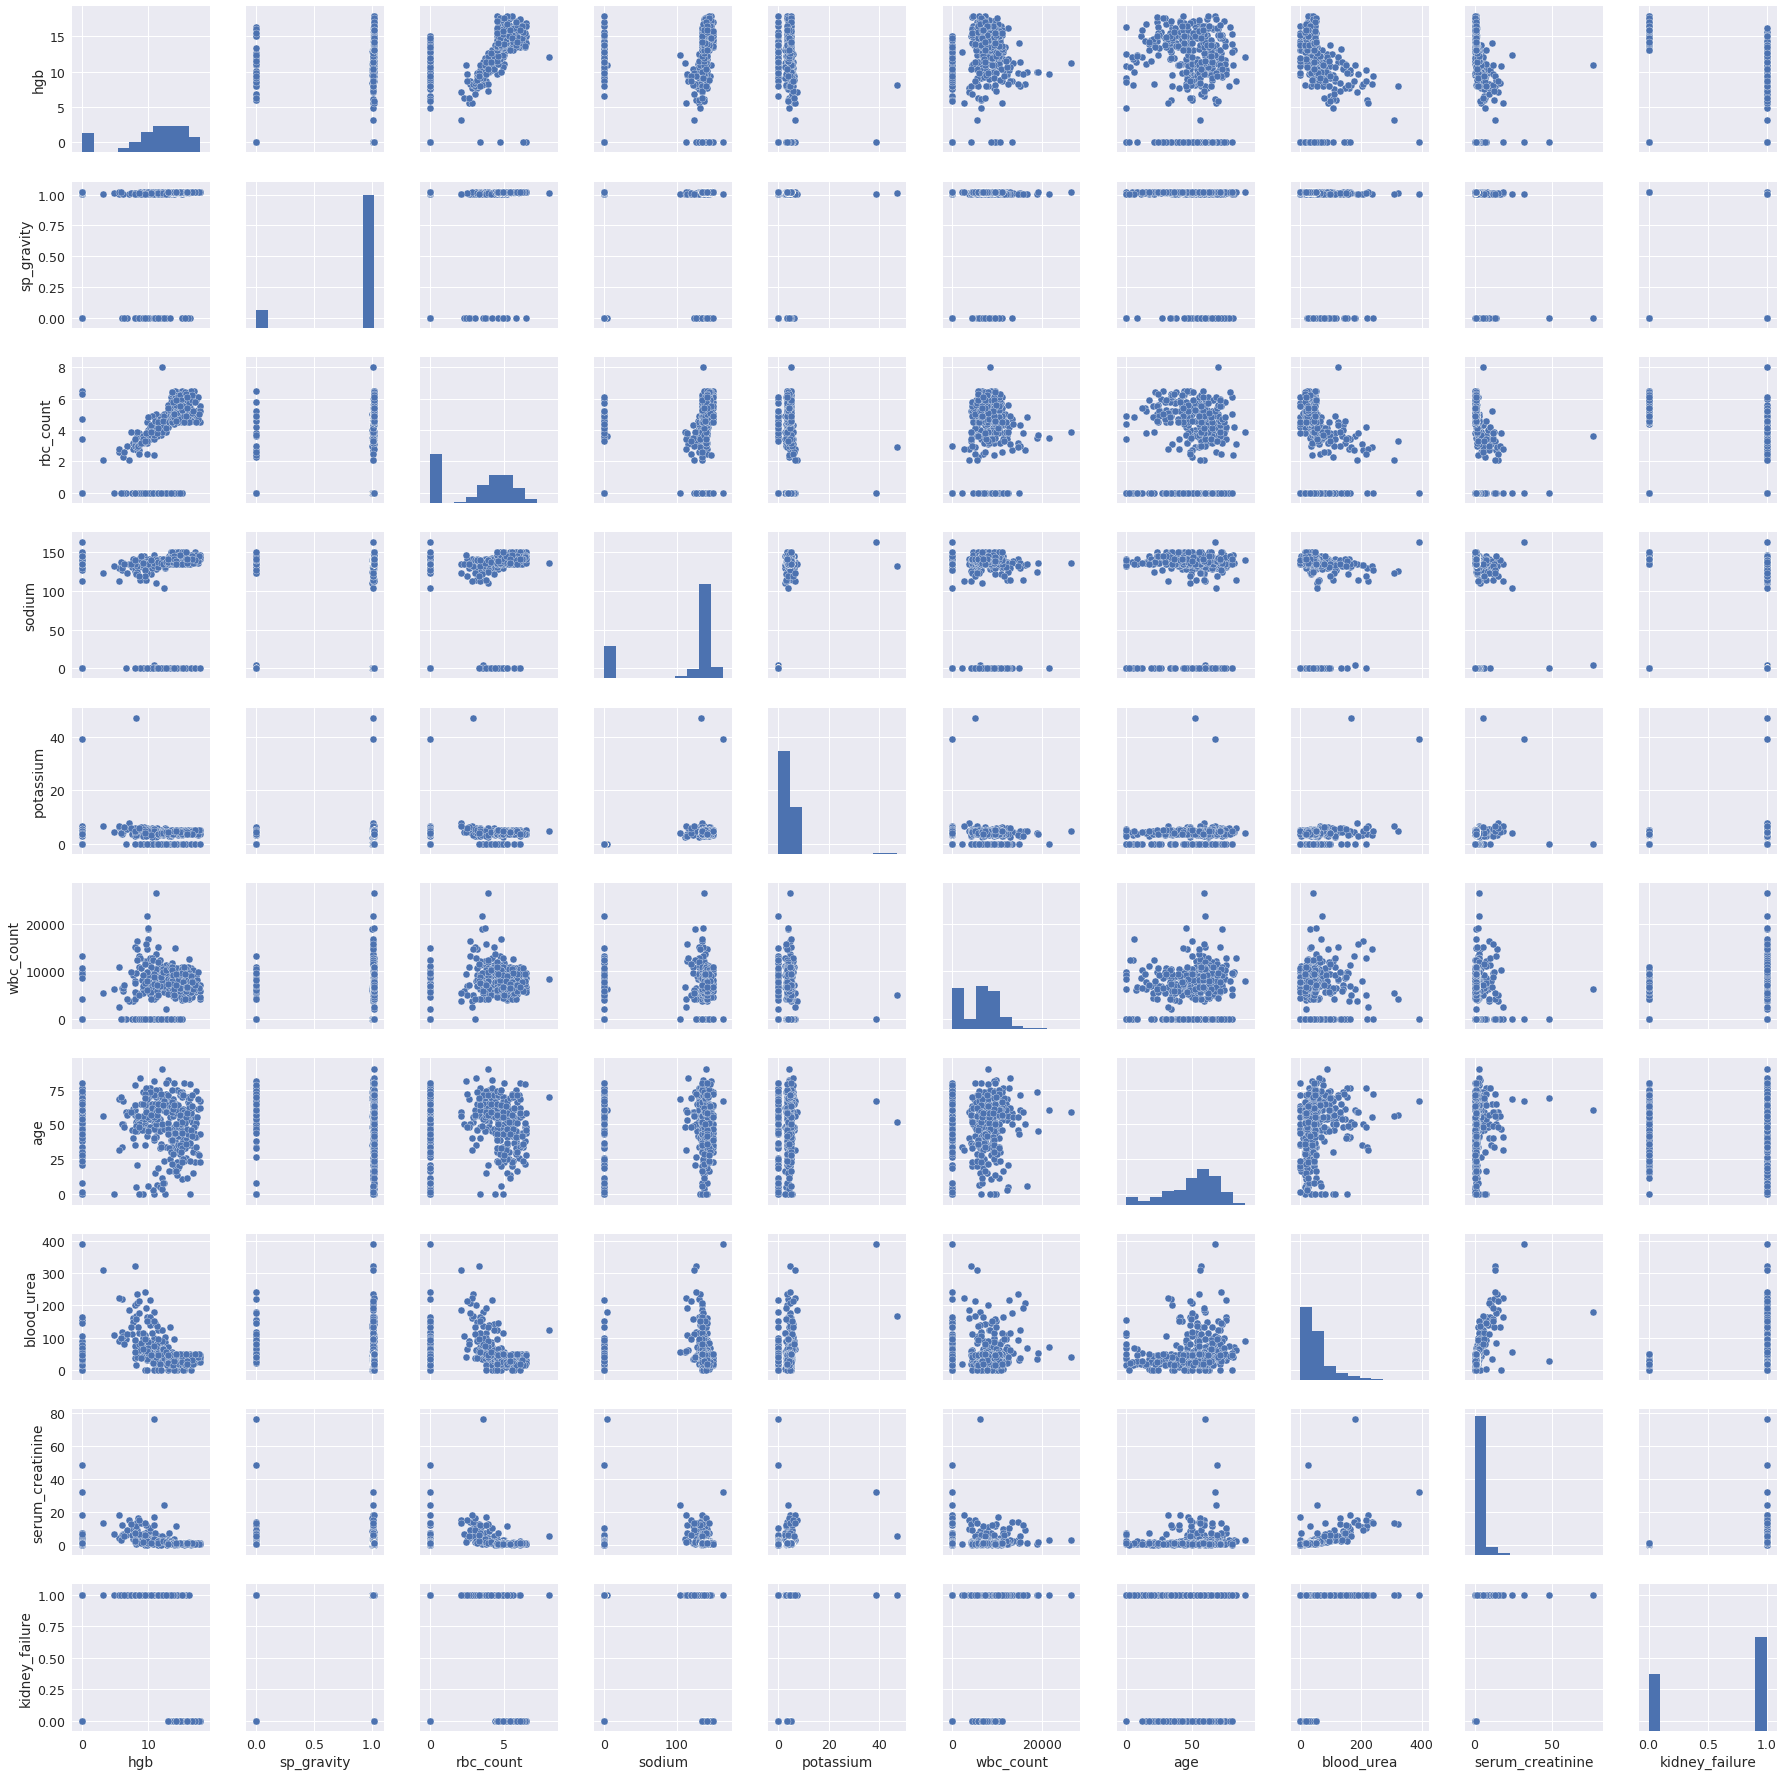

In [125]:
import seaborn as sns
#scatterplot
cols = ['hgb', 'sp_gravity', 'rbc_count', 'sodium', 'potassium', 'wbc_count', 'age', 'blood_urea','serum_creatinine', 'kidney_failure']
sns.pairplot(df_clean2[cols], size = 2.5)
plt.show()

In [126]:
X,y = df_clean2.iloc[:,:-1], df_clean2.iloc[:,-1]

In [127]:
X.head()

,age,bp,sp_gravity,albumin,sugar,rbc_level,puscell_presentornot,pus_cell_clumps,bacteria,blood_gluc_random,...,hgb,packed_cell_vol,wbc_count,rbc_count,hypertension,diabetus_mellitus,cad,appetite,pedal_edema,anemia
0,7.0,50.0,1.020,4.0,0.0,0,normal,notpresent,notpresent,0.0,...,11.3,38.0,6000.0,0.0,no,no,no,good,no,no
1,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,0.0,no,yes,no,poor,no,yes
2,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
3,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
4,60.0,90.0,1.015,3.0,0.0,0,0,notpresent,notpresent,74.0,...,12.2,39.0,7800.0,4.4,yes,yes,no,good,yes,no


In [128]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 24 columns):
age                     399 non-null float64
bp                      399 non-null float64
sp_gravity              399 non-null float64
albumin                 399 non-null float64
sugar                   399 non-null float64
rbc_level               399 non-null object
puscell_presentornot    399 non-null object
pus_cell_clumps         399 non-null object
bacteria                399 non-null object
blood_gluc_random       399 non-null float64
blood_urea              399 non-null float64
serum_creatinine        399 non-null float64
sodium                  399 non-null float64
potassium               399 non-null float64
hgb                     399 non-null float64
packed_cell_vol         399 non-null float64
wbc_count               399 non-null float64
rbc_count               399 non-null float64
hypertension            399 non-null object
diabetus_mellitus       399 non-null object
c

In [129]:
X.isnull().sum()

age                     0
bp                      0
sp_gravity              0
albumin                 0
sugar                   0
rbc_level               0
puscell_presentornot    0
pus_cell_clumps         0
bacteria                0
blood_gluc_random       0
blood_urea              0
serum_creatinine        0
sodium                  0
potassium               0
hgb                     0
packed_cell_vol         0
wbc_count               0
rbc_count               0
hypertension            0
diabetus_mellitus       0
cad                     0
appetite                0
pedal_edema             0
anemia                  0
dtype: int64

In [130]:
X_encoded = pd.get_dummies(X, prefix_sep='_', drop_first=True)

In [131]:
X_encoded.head()

,age,bp,sp_gravity,albumin,sugar,blood_gluc_random,blood_urea,serum_creatinine,sodium,potassium,...,diabetus_mellitus_no,diabetus_mellitus_yes,cad_no,cad_yes,appetite_good,appetite_poor,pedal_edema_no,pedal_edema_yes,anemia_no,anemia_yes
0,7.0,50.0,1.020,4.0,0.0,0.0,18.0,0.8,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
1,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,0.0,0.0,...,0,1,1,0,0,1,1,0,0,1
2,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,1,0,1,0,0,1,0,1,0,1
3,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
4,60.0,90.0,1.015,3.0,0.0,74.0,25.0,1.1,142.0,3.2,...,0,1,1,0,1,0,0,1,1,0


In [132]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 35 columns):
age                              399 non-null float64
bp                               399 non-null float64
sp_gravity                       399 non-null float64
albumin                          399 non-null float64
sugar                            399 non-null float64
blood_gluc_random                399 non-null float64
blood_urea                       399 non-null float64
serum_creatinine                 399 non-null float64
sodium                           399 non-null float64
potassium                        399 non-null float64
hgb                              399 non-null float64
packed_cell_vol                  399 non-null float64
wbc_count                        399 non-null float64
rbc_count                        399 non-null float64
rbc_level_abnormal               399 non-null uint8
rbc_level_normal                 399 non-null uint8
puscell_presentornot_abnormal    39

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


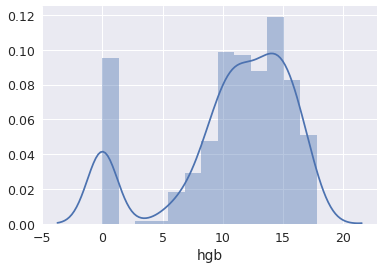

In [133]:
import seaborn as sns
sns.distplot(X_encoded['hgb'])
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

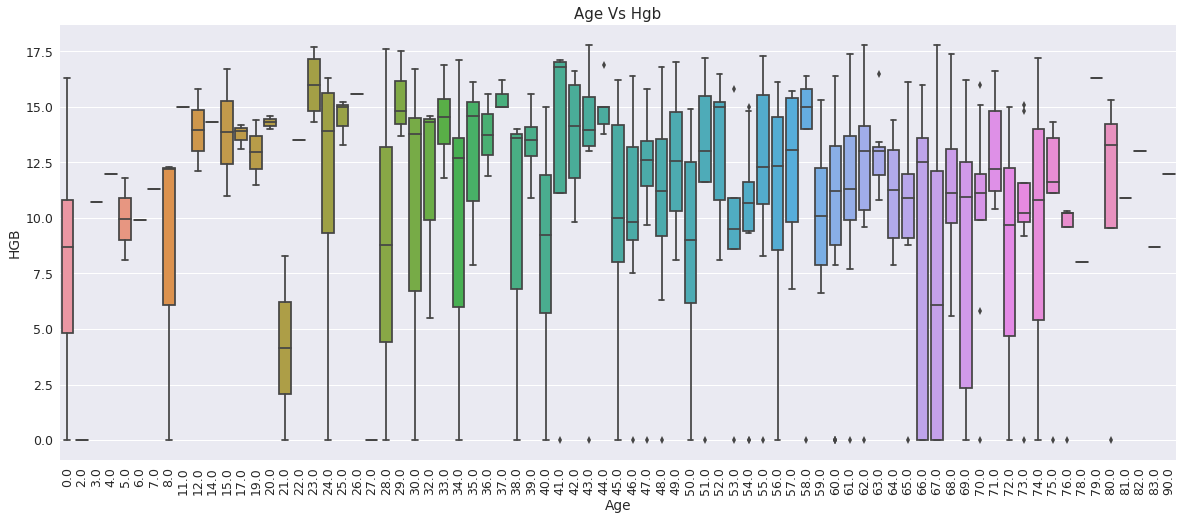

In [134]:
fig,ax= plt.subplots()
fig.set_size_inches(20,8)
sns.boxplot(x="age", y="hgb", data=X_encoded,ax=ax)
ax.set(ylabel='HGB',xlabel="Age",title="Age Vs Hgb")
plt.xticks(rotation=90) 

In [135]:
## Should the test-train split after moving label to another dataframe or before moving label 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=23)

In [136]:
xgb_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
params={"objective":"binary:logistic", "max_depth":4}
cv_results = xgb.cv(dtrain = xgb_dmatrix, params=params, nfold=4, num_boost_round=10, metrics="auc", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Print the AUC
print((cv_results["test-auc-mean"]).iloc[-1])

[00:56:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[00:56:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[00:56:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[00:56:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[00:56:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[00:56:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[00:56:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[00:56:51] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[00:56:51] /workspace

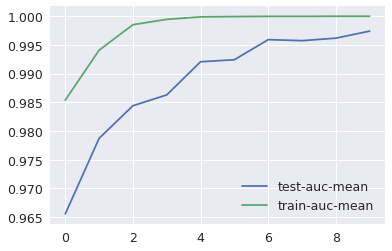

In [137]:
#print(cv_results)
cv_results.loc[0:,["test-auc-mean", "train-auc-mean"]].plot()

In [138]:
#xgb_clf = xgb.XGBClassifier()

from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

params_fixed = {
    'objective': 'binary:logistic',
    'silent': 1
}

xgb_pipeline = Pipeline([
                        ("st_scaler",StandardScaler()), 
                        ("xgb_model",xgb.XGBClassifier(**params_fixed, seed=123))
                       ])

gbm_param_grid = {
    'xgb_model__subsample': np.arange(.05, 1, .05),
    'xgb_model__gamma': [0, 0.5, 1],
    'xgb_model__max_depth': np.arange(3,20,1),
    'xgb_model__learning_rate': np.arange(0.05, 1.05, 0.05),
    'xgb_model__max_depth': range(3, 11),
    'xgb_model__colsample_bytree': np.arange(.1,1.05,.05), 
    'xgb_model__n_estimators': np.arange(50, 250, 50) # number of boosting rounds
}


# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator=xgb_pipeline, param_distributions=gbm_param_grid, n_iter=10, scoring="roc_auc", cv=5, verbose=1)

# Fit the estimator
randomized_roc_auc.fit(X_train, y_train)

# Compute metrics
print('Lowest RMSE found: ',randomized_roc_auc.best_score_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_roc_auc.best_score_)))
print('Best Estimator:\n',randomized_roc_auc.best_estimator_)
clf_best = randomized_roc_auc.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Lowest RMSE found:  1.0
Lowest RMSE found:  1.0
Best Estimator:
 Pipeline(memory=None,
     steps=[('st_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('xgb_model', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7500000000000002, gamma=0.5, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missi..., reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=123, silent=1,
       subsample=0.55))])


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


In [139]:
print('Best parameters found:: ', randomized_roc_auc.best_params_)

Best parameters found::  {'xgb_model__subsample': 0.55, 'xgb_model__n_estimators': 50, 'xgb_model__max_depth': 6, 'xgb_model__learning_rate': 0.1, 'xgb_model__gamma': 0.5, 'xgb_model__colsample_bytree': 0.7500000000000002}


In [140]:
randomized_roc_auc.best_score_

1.0

In [141]:
import matplotlib.pyplot as plt

params= {
    "objective":"binary:logistic",
    "subsample":0.75,
    "max_depth": 8,
    "learning_rate":0.70,
    "colsample_bytree":0.85,
    "n_estimators":200
}
# Train the model
xg_reg = xgb.train(dtrain=xgb_dmatrix, params=params, num_boost_round=10)

[00:57:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[00:57:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[00:57:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[00:57:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:57:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[00:57:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[00:57:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[00:57:09] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:57:09] /workspace

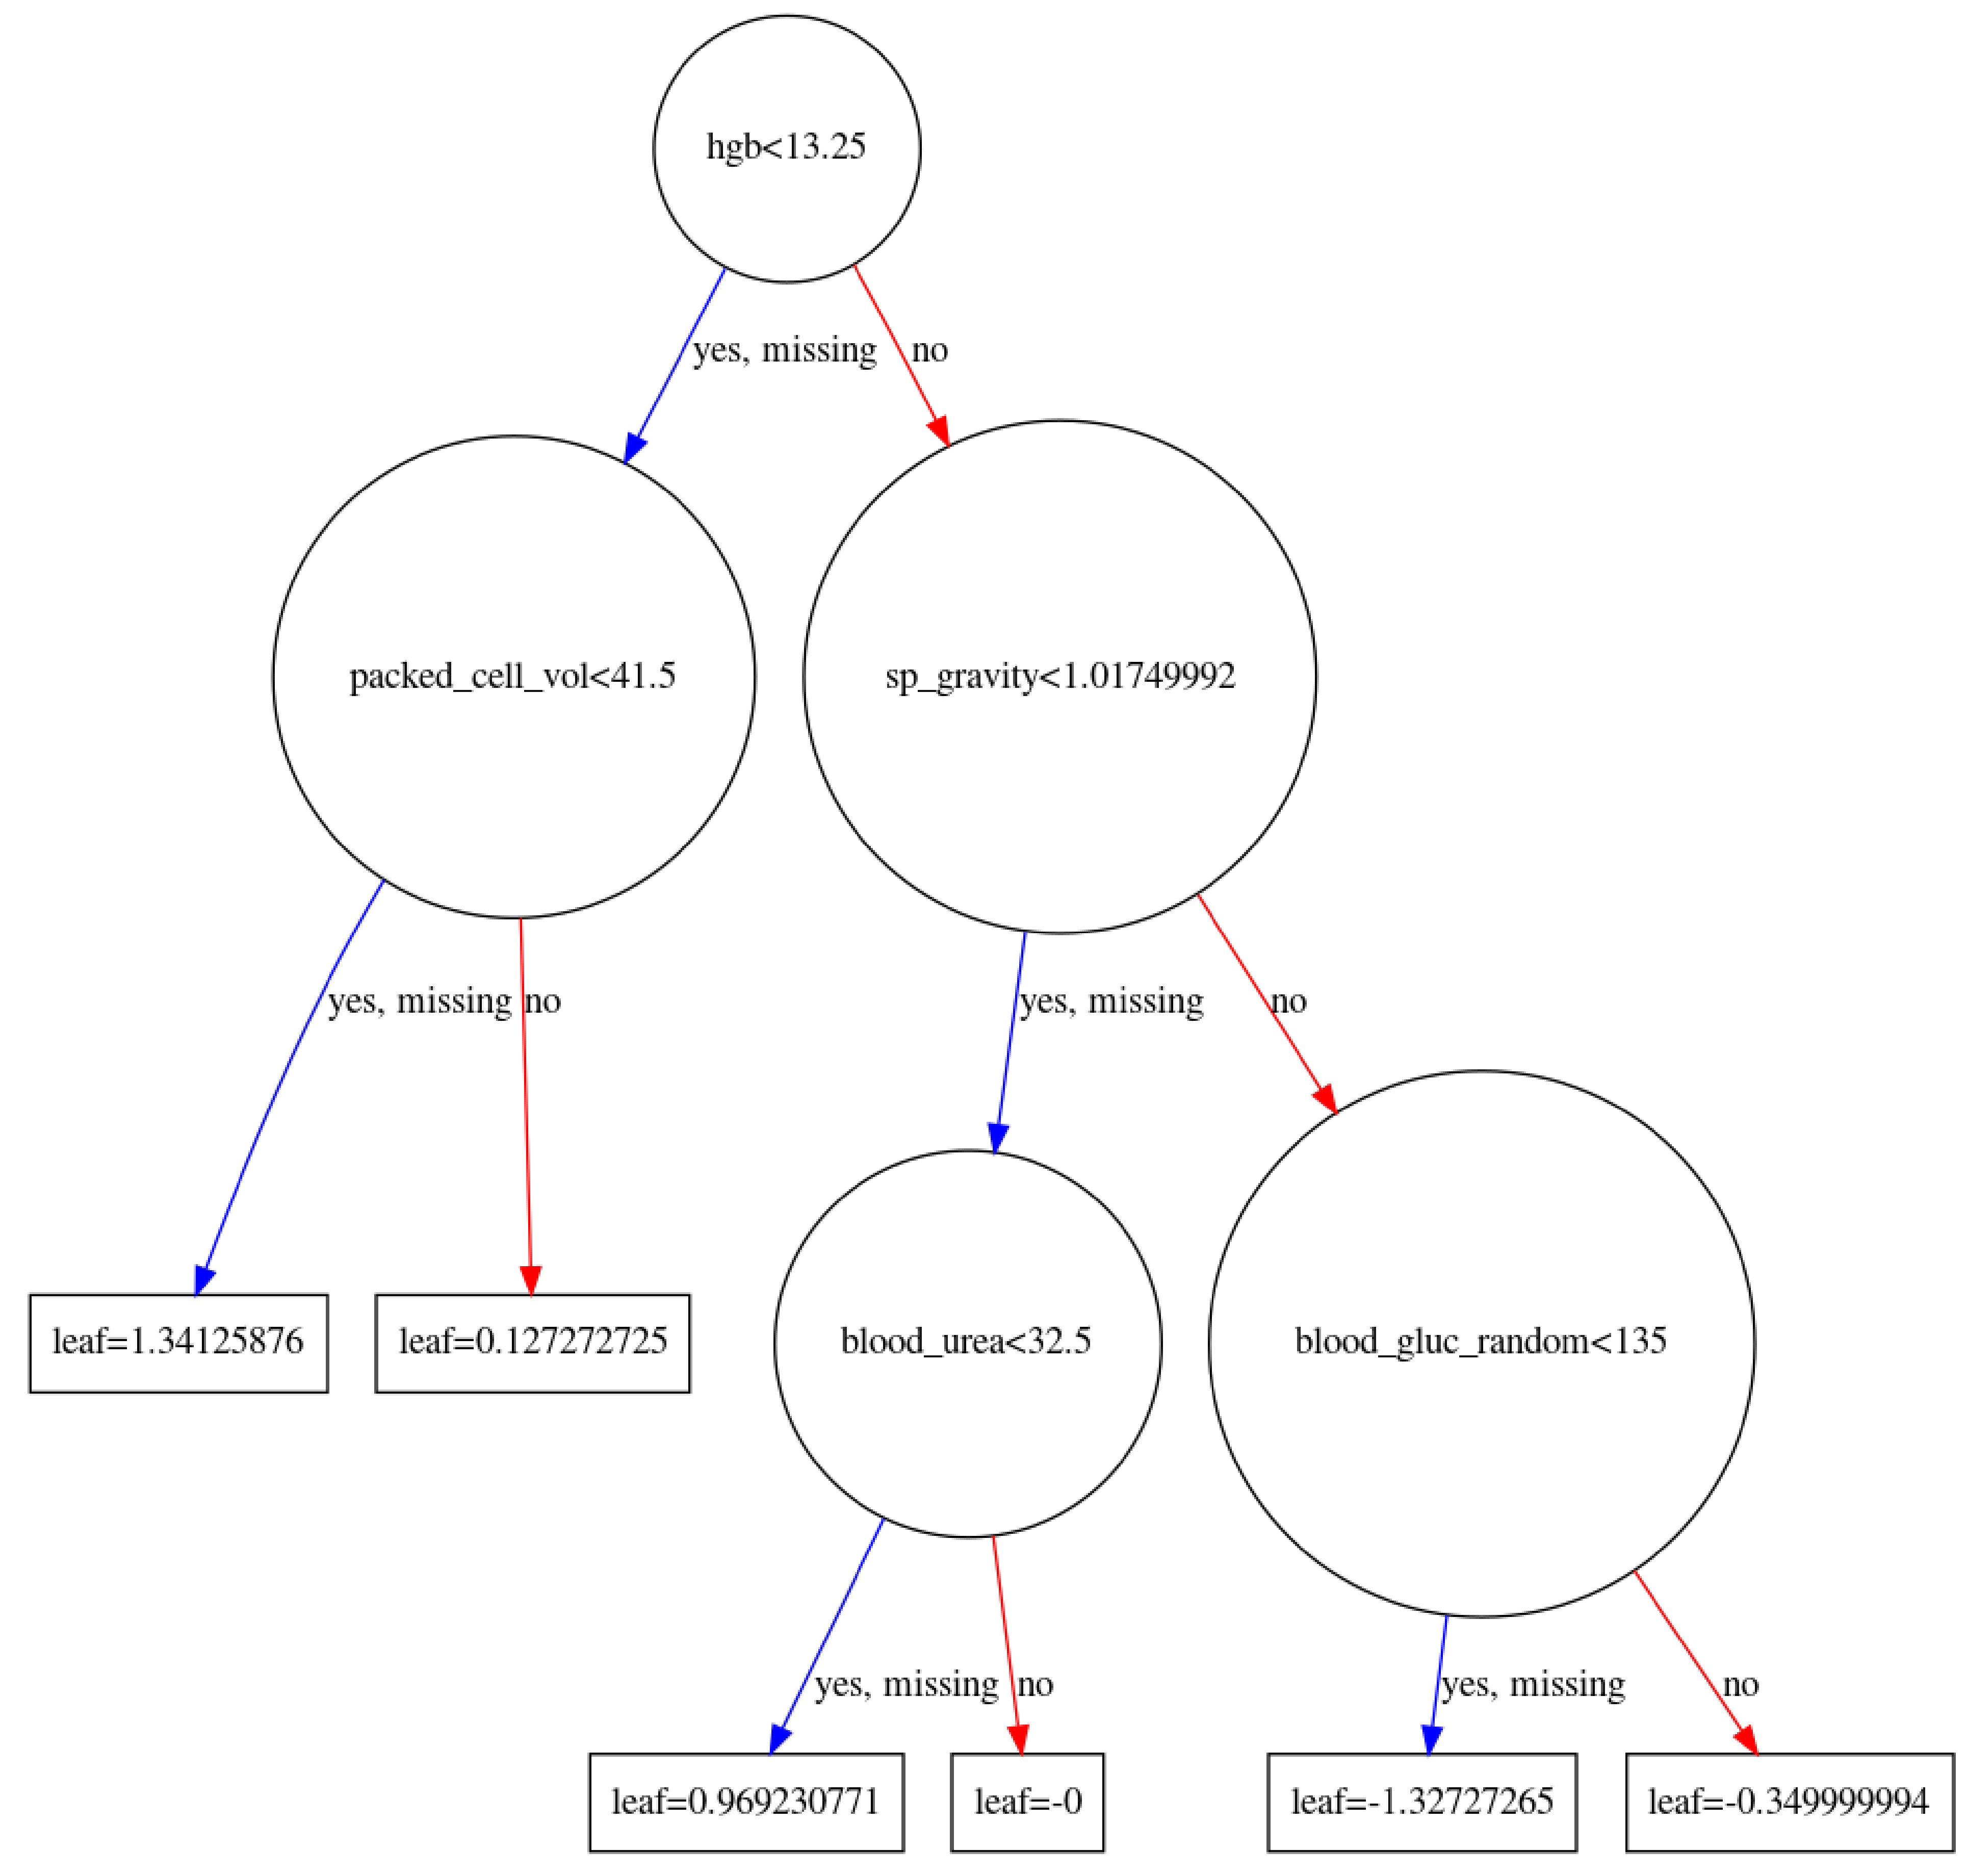

In [142]:
# Plot the first tree
xgb.plot_tree(xg_reg, num_trees=0)
fig = plt.gcf()
fig.set_size_inches(100, 67)
fig.savefig('tree.png')

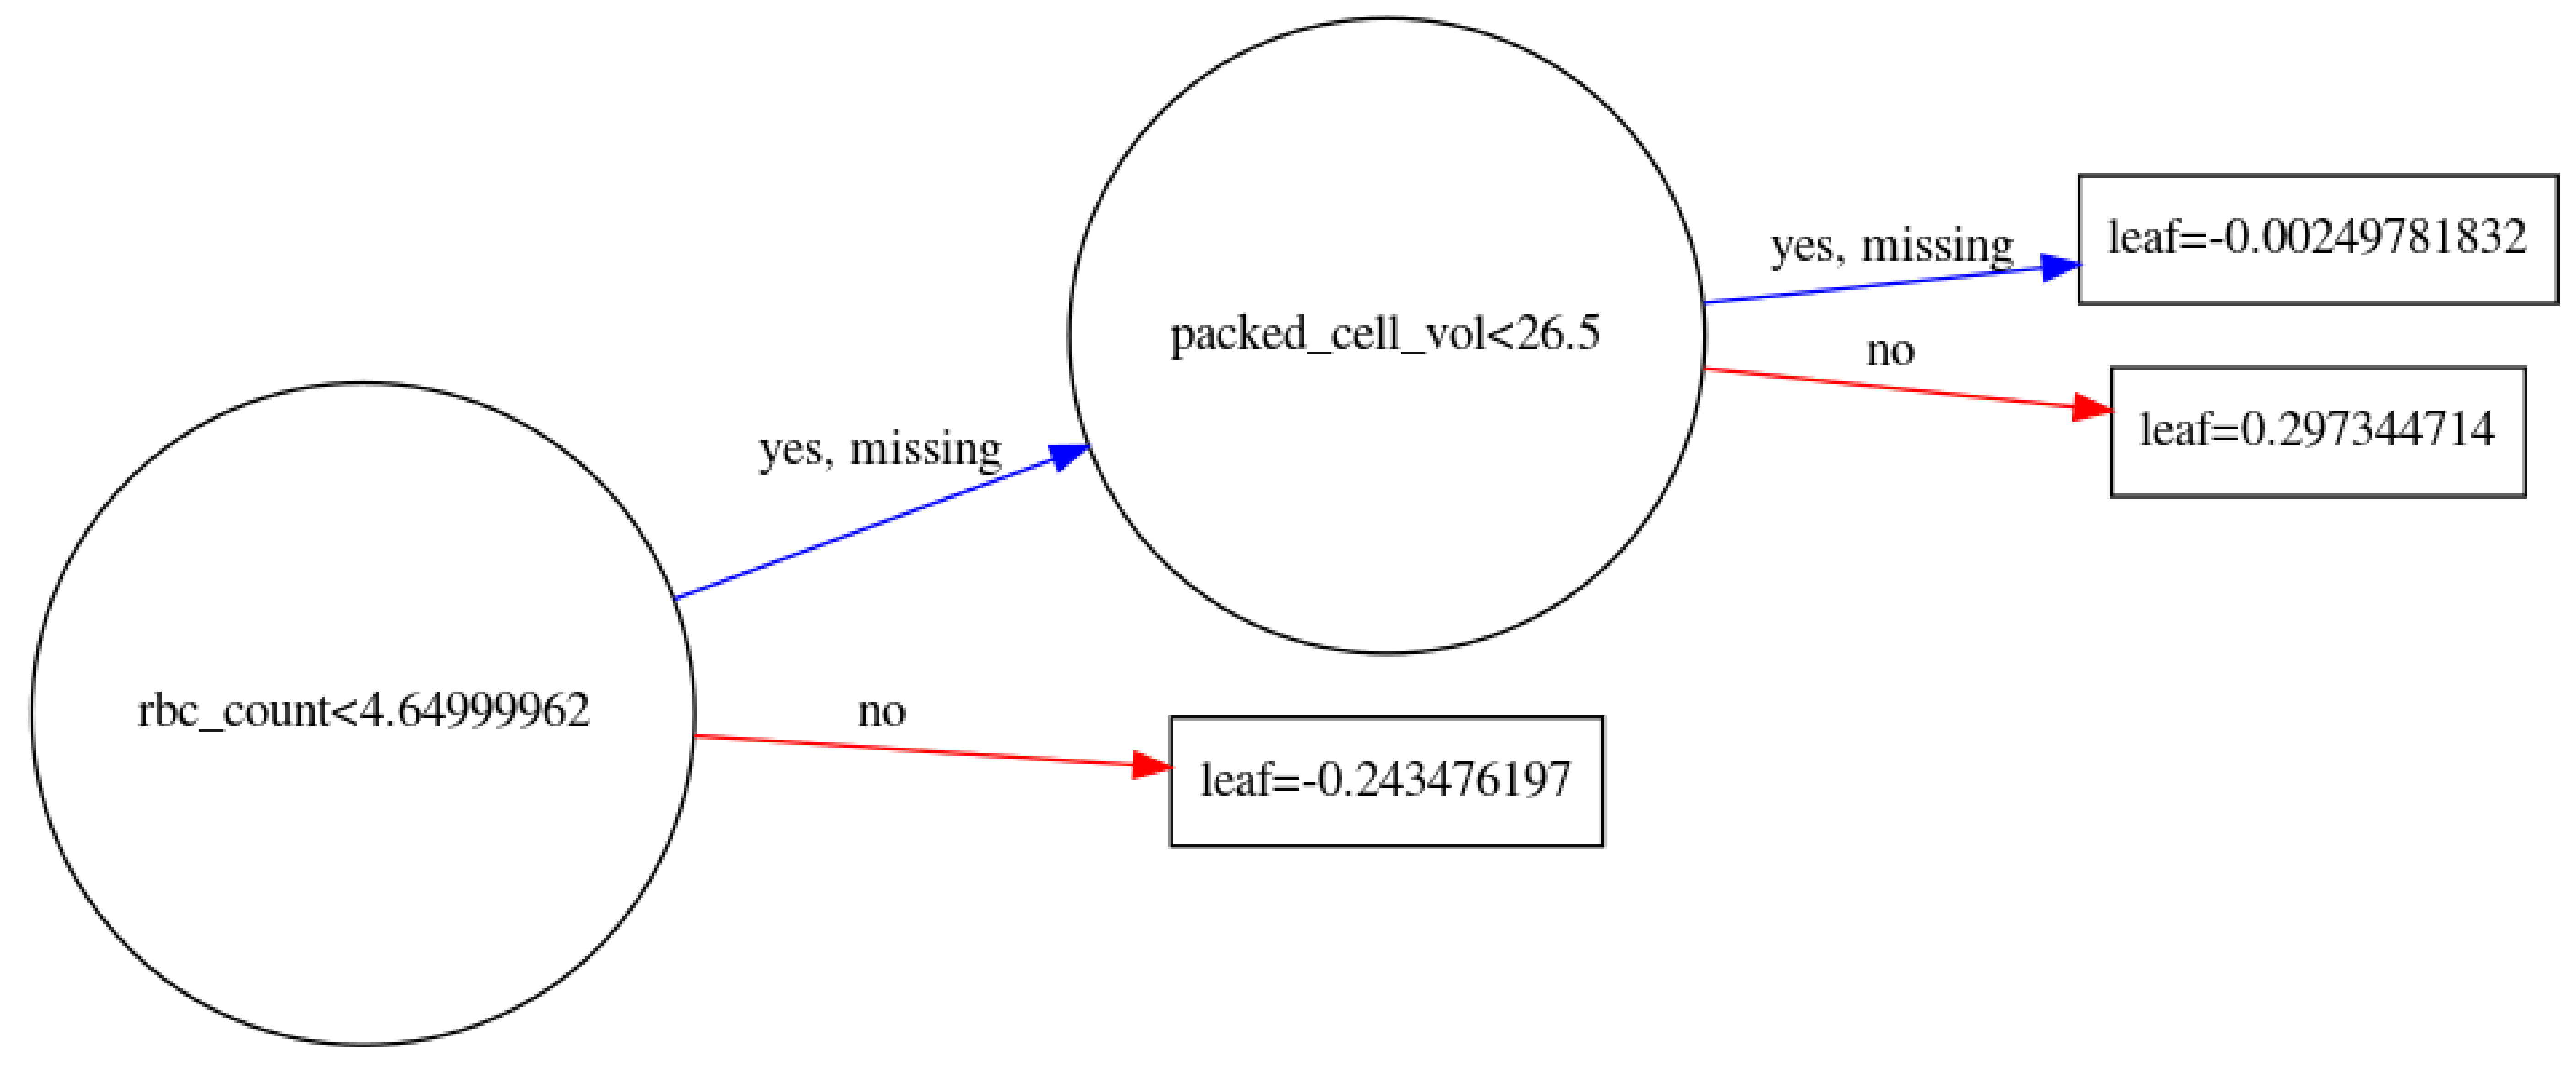

In [143]:
xgb.plot_tree(xg_reg, num_trees=9, rankdir="LR")
fig = plt.gcf()
fig.set_size_inches(100, 67)
plt.show()

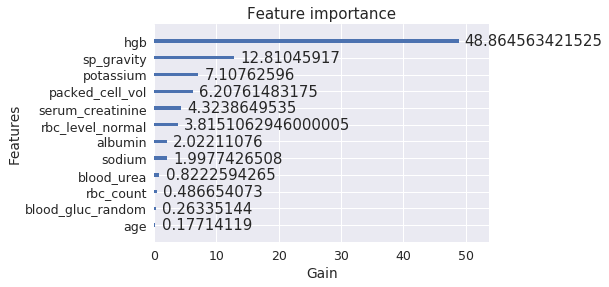

In [145]:
xgb.plot_importance(xg_reg, importance_type='gain', xlabel='Gain')
plt.show()

In [146]:
preds = randomized_roc_auc.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.987500


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [156]:
X_test.head()

,age,bp,sp_gravity,albumin,sugar,blood_gluc_random,blood_urea,serum_creatinine,sodium,potassium,...,diabetus_mellitus_no,diabetus_mellitus_yes,cad_no,cad_yes,appetite_good,appetite_poor,pedal_edema_no,pedal_edema_yes,anemia_no,anemia_yes
133,47.0,100.0,1.010,0.0,0.0,122.0,0.0,16.9,138.0,5.2,...,0,1,1,0,1,0,1,0,1,0
331,34.0,70.0,1.025,0.0,0.0,0.0,33.0,1.0,150.0,5.0,...,1,0,1,0,1,0,1,0,1,0
167,65.0,70.0,1.015,4.0,4.0,307.0,28.0,1.5,0.0,0.0,...,0,1,1,0,1,0,1,0,1,0
335,25.0,60.0,1.020,0.0,0.0,119.0,27.0,0.5,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
239,65.0,70.0,1.015,1.0,0.0,203.0,46.0,1.4,0.0,0.0,...,0,1,1,0,0,1,0,1,1,0


In [158]:
finaldf = X_test.copy()
finaldf.head()

,age,bp,sp_gravity,albumin,sugar,blood_gluc_random,blood_urea,serum_creatinine,sodium,potassium,...,diabetus_mellitus_no,diabetus_mellitus_yes,cad_no,cad_yes,appetite_good,appetite_poor,pedal_edema_no,pedal_edema_yes,anemia_no,anemia_yes
133,47.0,100.0,1.010,0.0,0.0,122.0,0.0,16.9,138.0,5.2,...,0,1,1,0,1,0,1,0,1,0
331,34.0,70.0,1.025,0.0,0.0,0.0,33.0,1.0,150.0,5.0,...,1,0,1,0,1,0,1,0,1,0
167,65.0,70.0,1.015,4.0,4.0,307.0,28.0,1.5,0.0,0.0,...,0,1,1,0,1,0,1,0,1,0
335,25.0,60.0,1.020,0.0,0.0,119.0,27.0,0.5,0.0,0.0,...,1,0,1,0,1,0,1,0,1,0
239,65.0,70.0,1.015,1.0,0.0,203.0,46.0,1.4,0.0,0.0,...,0,1,1,0,0,1,0,1,1,0


In [159]:
finaldf['actual_kidney_dis']=y_test.tolist()
finaldf.head()

,age,bp,sp_gravity,albumin,sugar,blood_gluc_random,blood_urea,serum_creatinine,sodium,potassium,...,diabetus_mellitus_yes,cad_no,cad_yes,appetite_good,appetite_poor,pedal_edema_no,pedal_edema_yes,anemia_no,anemia_yes,actual_kidney_dis
133,47.0,100.0,1.010,0.0,0.0,122.0,0.0,16.9,138.0,5.2,...,1,1,0,1,0,1,0,1,0,1
331,34.0,70.0,1.025,0.0,0.0,0.0,33.0,1.0,150.0,5.0,...,0,1,0,1,0,1,0,1,0,0
167,65.0,70.0,1.015,4.0,4.0,307.0,28.0,1.5,0.0,0.0,...,1,1,0,1,0,1,0,1,0,1
335,25.0,60.0,1.020,0.0,0.0,119.0,27.0,0.5,0.0,0.0,...,0,1,0,1,0,1,0,1,0,0
239,65.0,70.0,1.015,1.0,0.0,203.0,46.0,1.4,0.0,0.0,...,1,1,0,0,1,0,1,1,0,1


In [160]:
finaldf['predict_kidney_dis']=preds.tolist()
finaldf.head()

,age,bp,sp_gravity,albumin,sugar,blood_gluc_random,blood_urea,serum_creatinine,sodium,potassium,...,cad_no,cad_yes,appetite_good,appetite_poor,pedal_edema_no,pedal_edema_yes,anemia_no,anemia_yes,actual_kidney_dis,predict_kidney_dis
133,47.0,100.0,1.010,0.0,0.0,122.0,0.0,16.9,138.0,5.2,...,1,0,1,0,1,0,1,0,1,1
331,34.0,70.0,1.025,0.0,0.0,0.0,33.0,1.0,150.0,5.0,...,1,0,1,0,1,0,1,0,0,0
167,65.0,70.0,1.015,4.0,4.0,307.0,28.0,1.5,0.0,0.0,...,1,0,1,0,1,0,1,0,1,1
335,25.0,60.0,1.020,0.0,0.0,119.0,27.0,0.5,0.0,0.0,...,1,0,1,0,1,0,1,0,0,0
239,65.0,70.0,1.015,1.0,0.0,203.0,46.0,1.4,0.0,0.0,...,1,0,0,1,0,1,1,0,1,1


In [162]:
## Only value where predicted and actual are not the same
finaldf.loc[finaldf['predict_kidney_dis'] != finaldf['actual_kidney_dis']]

,age,bp,sp_gravity,albumin,sugar,blood_gluc_random,blood_urea,serum_creatinine,sodium,potassium,...,cad_no,cad_yes,appetite_good,appetite_poor,pedal_edema_no,pedal_edema_yes,anemia_no,anemia_yes,actual_kidney_dis,predict_kidney_dis
69,61.0,80.0,1.015,0.0,4.0,360.0,19.0,0.7,137.0,4.4,...,1,0,1,0,1,0,1,0,1,0


In [163]:
finaldf[finaldf['actual_kidney_dis'] == 1].head(10)

,age,bp,sp_gravity,albumin,sugar,blood_gluc_random,blood_urea,serum_creatinine,sodium,potassium,...,cad_no,cad_yes,appetite_good,appetite_poor,pedal_edema_no,pedal_edema_yes,anemia_no,anemia_yes,actual_kidney_dis,predict_kidney_dis
133,47.0,100.0,1.010,0.0,0.0,122.0,0.0,16.9,138.0,5.2,...,1,0,1,0,1,0,1,0,1,1
167,65.0,70.0,1.015,4.0,4.0,307.0,28.0,1.5,0.0,0.0,...,1,0,1,0,1,0,1,0,1,1
239,65.0,70.0,1.015,1.0,0.0,203.0,46.0,1.4,0.0,0.0,...,1,0,0,1,0,1,1,0,1,1
101,17.0,60.0,1.010,0.0,0.0,92.0,32.0,2.1,141.0,4.2,...,1,0,1,0,1,0,1,0,1,1
176,65.0,80.0,1.015,2.0,1.0,215.0,133.0,2.5,0.0,0.0,...,1,0,1,0,1,0,1,0,1,1
82,48.0,70.0,1.015,1.0,0.0,127.0,19.0,1.0,134.0,3.6,...,1,0,1,0,1,0,1,0,1,1
59,67.0,90.0,1.020,1.0,0.0,141.0,66.0,3.2,138.0,6.6,...,1,0,1,0,1,0,1,0,1,1
178,72.0,90.0,1.010,2.0,0.0,124.0,53.0,2.3,0.0,0.0,...,1,0,1,0,1,0,1,0,1,1
14,40.0,80.0,1.015,3.0,0.0,76.0,162.0,9.6,141.0,4.9,...,1,0,1,0,1,0,0,1,1,1
88,50.0,70.0,1.020,0.0,0.0,109.0,32.0,1.4,139.0,4.7,...,1,0,0,1,1,0,1,0,1,1


In [164]:
## Double check the values based on how trees are split
finaldf.loc[(finaldf.hgb < 13.5) & (finaldf.packed_cell_vol < 41.5) & (finaldf.blood_urea < 17)]

,age,bp,sp_gravity,albumin,sugar,blood_gluc_random,blood_urea,serum_creatinine,sodium,potassium,...,cad_no,cad_yes,appetite_good,appetite_poor,pedal_edema_no,pedal_edema_yes,anemia_no,anemia_yes,actual_kidney_dis,predict_kidney_dis
133,47.0,100.0,1.010,0.0,0.0,122.0,0.0,16.9,138.0,5.2,...,1,0,1,0,1,0,1,0,1,1
63,55.0,80.0,1.010,0.0,0.0,146.0,0.0,0.0,0.0,0.0,...,1,0,1,0,1,0,1,0,1,1
112,61.0,90.0,1.015,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1,0,0,1,1,1
66,45.0,80.0,1.020,3.0,0.0,425.0,0.0,0.0,0.0,0.0,...,1,0,0,1,1,0,1,0,1,1
74,5.0,0.0,1.015,1.0,0.0,0.0,16.0,0.7,138.0,3.2,...,1,0,1,0,1,0,0,1,1,1
115,0.0,70.0,1.015,4.0,0.0,104.0,16.0,0.5,0.0,0.0,...,1,0,1,0,0,1,1,0,1,1


In [168]:
checkMetrics = np.where(finaldf['actual_kidney_dis'] != finaldf['predict_kidney_dis'], "MisMatch", "Match")
unique, counts = np.unique(checkMetrics, return_counts=True)
dict(zip(unique, counts))

{'Match': 79, 'MisMatch': 1}

In [151]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, preds))

confusion = confusion_matrix(y_test, preds)
print('Confusion Matrix:')
print(confusion)

print('Accuracy: %3f' % accuracy_score(y_test, preds))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98        31
          1       1.00      0.98      0.99        49

avg / total       0.99      0.99      0.99        80

Confusion Matrix:
[[31  0]
 [ 1 48]]
Accuracy: 0.987500


In [152]:
from sklearn.tree import DecisionTreeClassifier
# Instantiate the classifier: dt_clf_4
dt_clf_4 = DecisionTreeClassifier(max_depth=4)

# Fit the classifier to the training set
dt_clf_4.fit(X_train,y_train)

# Predict the labels of the test set: y_pred_4
y_pred_4 = dt_clf_4.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred_4==y_test))/y_test.shape[0]
print("accuracy:", accuracy)

accuracy: 0.9625


In [153]:
from sklearn.ensemble import RandomForestClassifier
# DecisionTreeClassifier for single tree
from sklearn.model_selection import cross_val_score
rf_clf = RandomForestClassifier()
scores = cross_val_score(rf_clf,X_train,y_train,scoring="roc_auc",cv=10)
#scores = cross_val_score(xgb_clf,X_train,y_train,scoring="roc_auc",cv=10)

final_avg = np.mean(scores)
print(final_avg)

1.0
